In [57]:
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

In [17]:
# Prepare the input X and target Y
def get_XY(time_series, time_steps):
    Y_ind = np.arange(time_steps, len(time_series), time_steps)
    Y = time_series[Y_ind]
    rows_x = len(Y)
    X = time_series[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y


def get_ts(url: str, time_steps: int, split_percent: float) -> DataFrame: 
    data_frame = read_csv(url, usecols=[1])
    data = np.array(data_frame.values.astype('float32')).flatten()
    data = data / data.max()
    N = len(data)
    split = int(N * split_percent)
    train_data = data[0: split]
    test_data = data[split:]

    # create X -> y for training and for testing
    X_train, y_train = get_XY(train_data, time_steps)
    X_test, y_test = get_XY(test_data, time_steps)

    return data, X_train, X_test, y_train, y_test

In [12]:
# constants
url = 'https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_756_time_series.csv'
split_percent = 0.3
time_steps = 24 # 12 corresponds to 2h of observations
hidden_units = 10
dense_units = 1
activation = 'tanh'

In [18]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=url,
    time_steps=time_steps,
    split_percent=split_percent
)

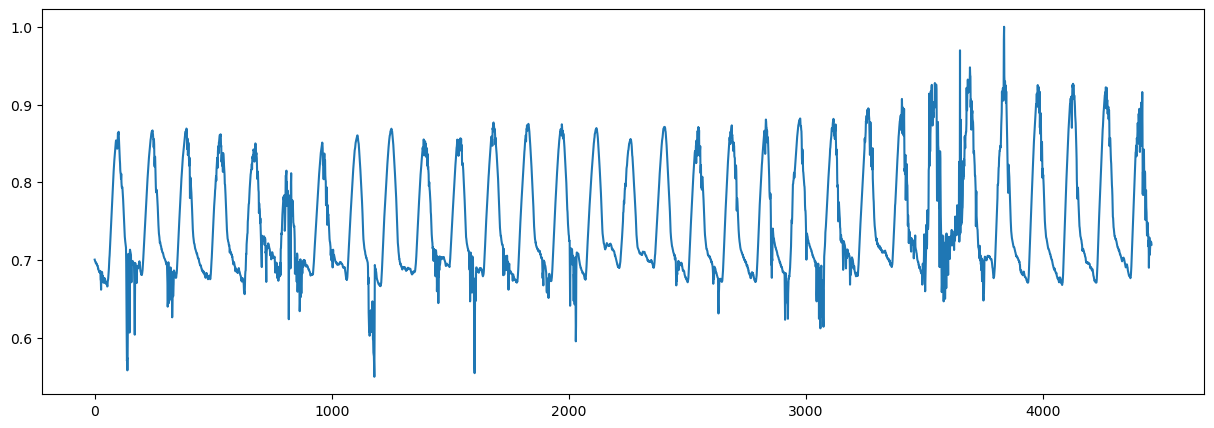

In [20]:
# plot original data to check time-series
plt.figure(figsize=(15, 5))
plt.plot(data, label = 'Original data');

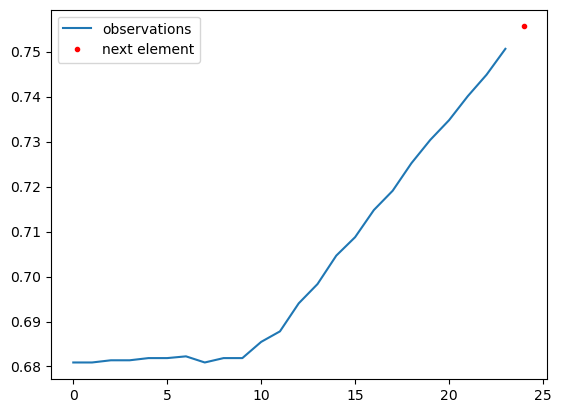

In [22]:
# this is an example of how the training set is created
# given the 'blue curve', predict the 'red dot'
index = 38
plt.plot(X_train[index], label='observations')
plt.plot(time_steps, y_train[index], 'r.', label='next element')
plt.legend();

In [23]:
# create the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(hidden_units,
                    input_shape = (time_steps, 1),
                    activation = activation))
model.add(Dense(units = dense_units,
                activation = activation))
model.compile(loss='mean_squared_error',
              optimizer='adam')

# train the model
epochs = 30
history = model.fit(
  X_train, y_train,
  epochs = epochs,
  batch_size = 1,
  validation_data = (X_test, y_test)
)

2024-11-21 12:56:25.086016: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-21 12:56:27.308909: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-21 12:56:27.309612: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 1/30


2024-11-21 12:56:31.982351: I external/local_xla/xla/service/service.cc:168] XLA service 0x7e688002bfc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-21 12:56:31.982447: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2024-11-21 12:56:32.119960: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-21 12:56:32.375339: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1732193792.659556    5454 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 [==============================] - 4s 12ms/step - loss: 0.1722 - val_loss: 0.0284
Epoch 2/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0097 - val_loss: 0.0071
Epoch 3/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0048 - val_loss: 0.0059
Epoch 4/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0046 - val_loss: 0.0058
Epoch 5/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0045 - val_loss: 0.0055
Epoch 6/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0044 - val_loss: 0.0056
Epoch 7/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0053
Epoch 8/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0043 - val_loss: 0.0050
Epoch 9/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 10/30
55/55 [==============================] - 0s 9ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 11/30
55/55 [==========

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


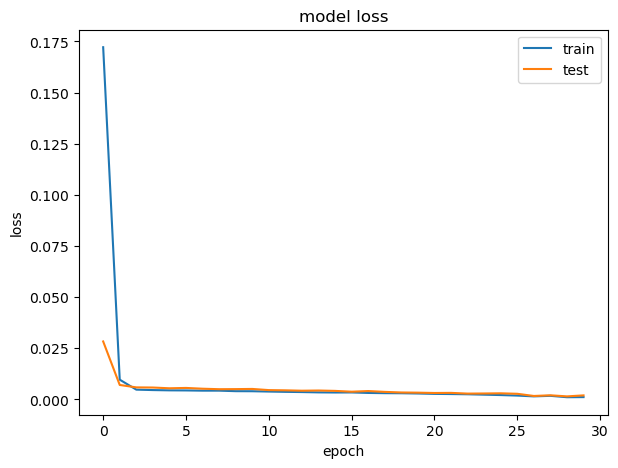

In [25]:
plt.figure(figsize=(15,5))

# plt.subplot(121)
# plt.plot(history.history['accuracy'], label = 'train')
# # plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

5/5 [==============================] - 1s 148ms/step


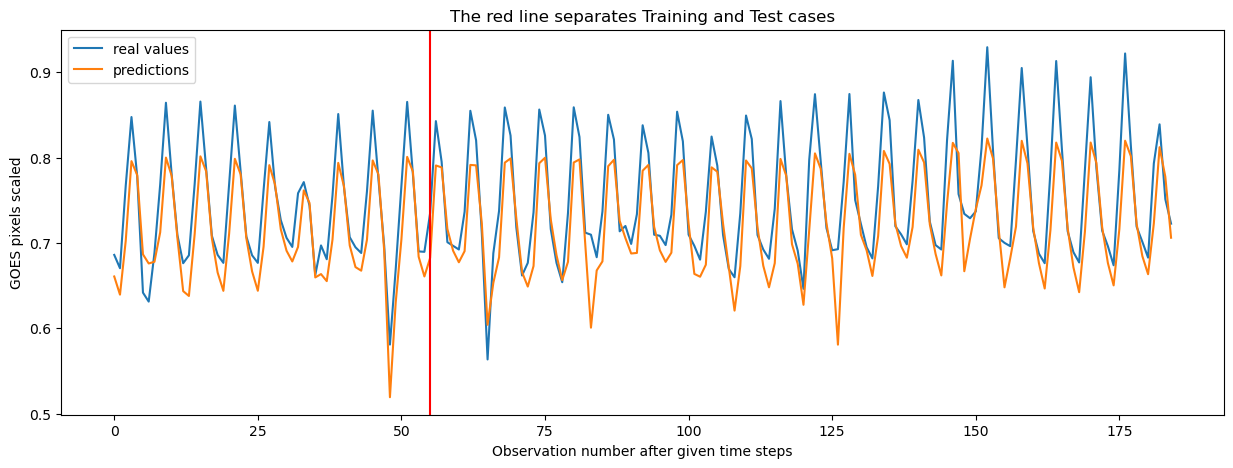

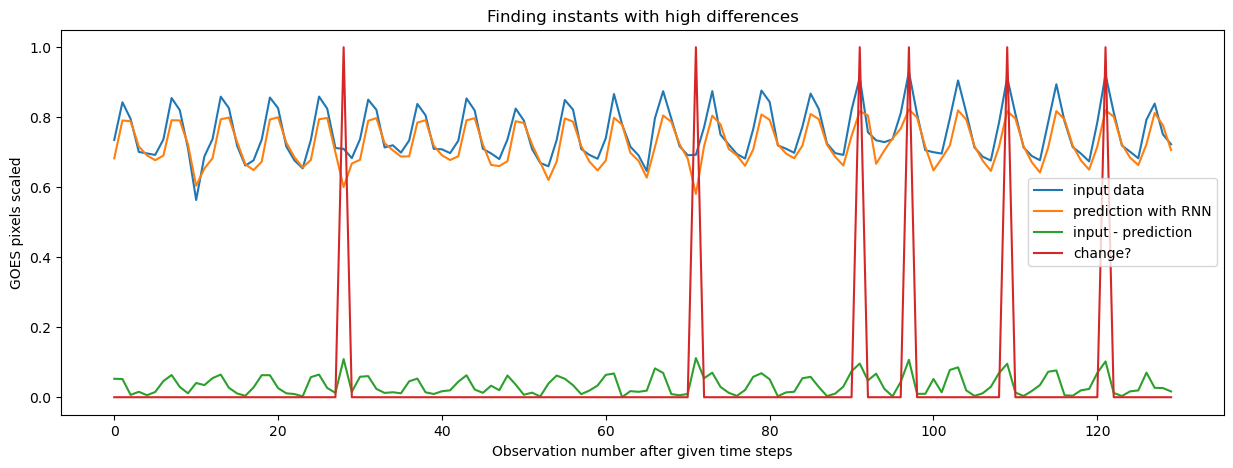

In [26]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');

# Exercise

Apply the trained model (SimpleRNN) in the following curves, displaying the graphs of change detection for each curve:

- [Curve 1](https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_703_time_series.csv)
- [Curve 2](https://)
- [Curve 3](https://)
- [Curve 4](https://)
- [Curve 5](https://)

> If needed, train the model with 2 curves and test in the other 4.

In [27]:
curve_1='https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/id_703_time_series.csv'

In [48]:
data, X_train, X_test, y_train, y_test=get_ts(
    url=curve_1,
    time_steps=time_steps,
    split_percent=split_percent
)

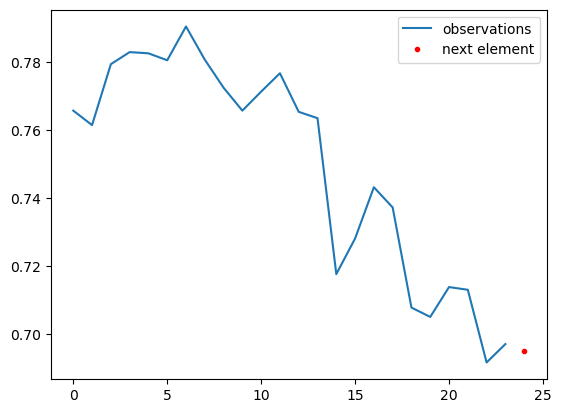

In [50]:
index = 38
plt.plot(X_train[40], label='observations')
plt.plot(time_steps, y_train[index], 'r.', label='next element')
plt.legend();

5/5 [==============================] - 0s 3ms/step


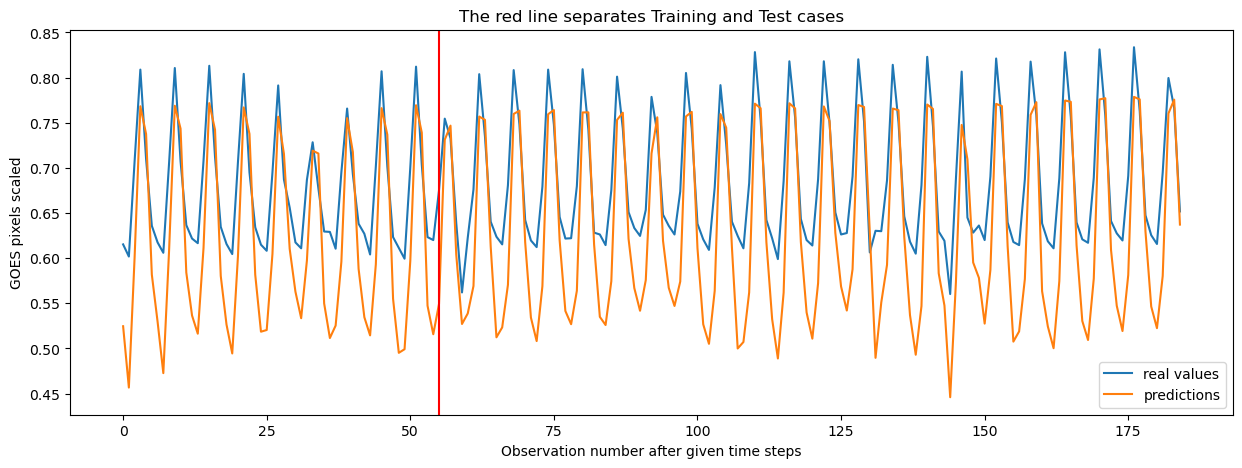

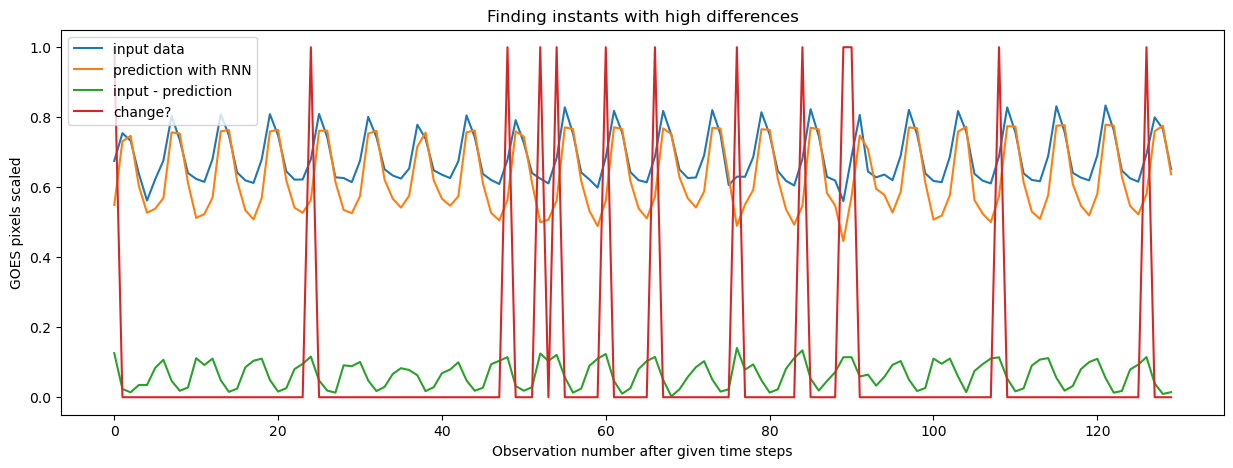

In [55]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

difference = np.abs(y_test - test_predict.flatten())
change_threshold = difference.max() * 0.8

plt.figure(figsize=(15, 5))
plt.plot(y_test, label = 'input data')
plt.plot(test_predict.flatten(), label = 'prediction with RNN')
plt.plot(difference, label = 'input - prediction')
plt.plot(difference > change_threshold, label = 'change?')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('Finding instants with high differences');

## LSTM

In [62]:
model=Sequential()
model.add(LSTM(units=hidden_units, 
               input_shape=(time_steps, 1),
               activation=activation))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error',
              optimizer='adam')
# train the model
epochs = 30
history = model.fit(
  X_train, y_train,
  epochs = epochs,
  batch_size = 1,
  validation_data = (X_test, y_test)
)

Epoch 1/30
55/55 [==============================] - 2s 10ms/step - loss: 0.2058 - val_loss: 0.0139
Epoch 2/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0041
Epoch 3/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0042
Epoch 4/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 5/30
55/55 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/30
55/55 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0036
Epoch 7/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 8/30
55/55 [==============================] - 0s 5ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 9/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 10/30
55/55 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 11/30
55/55 

5/5 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'The red line separates Training and Test cases')

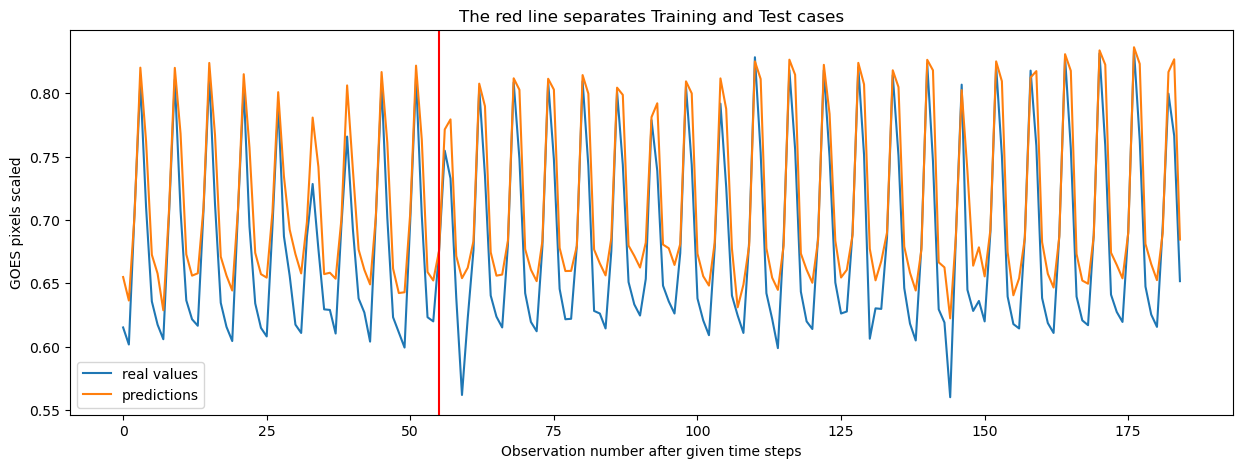

In [63]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

all_data = np.append(y_train, y_test)
predictions = np.append(train_predict, test_predict)

# plot the results
plt.figure(figsize=(15, 5))
plt.plot(all_data, label = 'real values')
plt.plot(predictions, label = 'predictions')
plt.axvline(x = len(y_train), color='r')
plt.legend()
plt.xlabel('Observation number after given time steps')
plt.ylabel('GOES pixels scaled')
plt.title('The red line separates Training and Test cases')

# difference = np.abs(y_test - test_predict.flatten())
# change_threshold = difference.max() * 0.8

# plt.figure(figsize=(15, 5))
# plt.plot(y_test, label = 'input data')
# plt.plot(test_predict.flatten(), label = 'prediction with RNN')
# plt.plot(difference, label = 'input - prediction')
# plt.plot(difference > change_threshold, label = 'change?')
# plt.legend()
# plt.xlabel('Observation number after given time steps')
# plt.ylabel('GOES pixels scaled')
# plt.title('Finding instants with high differences');